<h1>Odločitveni Sistemi</h1>
<h2>Prva seminarska naloga</h2>


<h3>David Bojanić</h3>
<h3>Ljubljana, 09.12.2024.</h3>
<h3>Uvod</h3>
<p>Tema, ki sem jo izbral, je tista, s katero se številni študenti in mladi ljudje v Ljubljani srečujejo skoraj vsako leto, in sicer izbira stanovanja, v katerem bodo bivali med študijem. Žal pa ta težava v zadnjem času postaja vse manj odločitvena in vse bolj iskalna. Zbrani podatki so pridobljeni s spletne strani <a href="https://www.nepremicnine.net">nepremicnine.net</a> ter z mojih ali mojih prijateljevih "zgodbah".</p>


In [301]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np

<h3> Pregled Varijant, Kriterijev in Podatkov </h3>

In [302]:
data = pd.read_csv("data.csv")
data.head()

,Stanovanje,Kvadratura_m2,Cena_mesec,St_cimer,St_pozn_cimer,Pohistvo,Parking,Dist_do_faksa_km,Dist_do_centra_min,Zasebnost,Osebni_prostor_m2,Optika_internet
0,Tivoli,50,375,1,1,4,da,4.5,21,3,15,da
1,Preglov trg,70,425,2,1,3,da,9.3,58,4,25,da
2,Streliška,64,420,1,1,2,da,5.7,18,5,32,ne
3,Gornje Poljane,35,700,0,0,5,da,6.0,22,5,35,da
4,Razstavišče,90,350,4,0,3,ne,5.5,23,2,15,ne


### Razlaga kriterijev in izpeljanih vozlišč

Model vsebuje 11 osnovnih kriterij in 4 izpeljanih vozlišč.

<ul>
    <li>Stanovanje - ime stanovanja sem dal glede na njegovo okvirno lokacijo (ni kriterij)</li>
    <li>Kvadratura_m2 - velikost stanovanja v m² </li>
    <li>Cena_mesec - skupna mesečna cena z vsemi stroški</li>
    <li>St_cimer - število cimrov v stanovanju</li>
    <li>St_pozn_cimer - število cimrov, ki jih že poznam iz preteklosti (prijatelji)</li>
    <li>Pohistvo - stopnja kvalitete pohištva stanovanja na lestvici od 1 do 5 </li>
    <li>Parking - ali je parkirni prostor vključen v ceno</li>
    <li>Dist_do_faksa_km - razdalja do fakultete v kilometrih (izbral sem kilometre, ker največkrat potujem z avtomobilom ali kolesom)</li>
    <li>Dist_do_centra_min - razdalja do centra izražena v minutah hoje od stavbe do središča mesta</li>
    <li>Zasebnost - stopnja zasebnosti v stanovanju na lestvici od 1 do 5 </li>
    <li>Osebni_prostor_m2 - kvadratura prostora, ki je namenjena samo meni </li>
    <li>Optika_internet - ali je optični internet na voljo v stanovanju</li>
</ul>


---

### Pohištvo 

Za oceno pohištva stanovanja sem uporabil lestvico od 1 do 5, kjer večja številka pomeni boljši kvalitet pohištva:

1: **Pomanjkanje osnovnega pohištva**: Stanovanje nima potrebnega pohištva za normalno delovanje (npr. brez postelje, mize, stola, omare...).<br>
2: **Osnovno pohištvo v slabem stanju**: Stanovanje ima nekaj osnovnega pohištva, vendar ni v dobrem stanju.<br>
3: **Osnovno pohištvo v dobrem stanju**: Stanovanje vključuje vsa potrebna pohištva v uporabnem stanju.<br>
4: **Dobro opremljeno s pripomočki**: Stanovanje je popolnoma opremljeno z dobrim pohištvom in nekaj dodatki (npr. dodatna shranjevalna mesta, gospodinjski aparati).<br>
5: **Popolnoma novo opremljeno**: Stanovanje je opremljeno z novim ali skoraj novim pohištvom in vključuje dodatne udobnosti (npr. televizija, pomivalni stroj, mikrovalovna pečica).<br>

---

### Zasebnost

Za oceno zasebnosti stanovanja sem uporabil lestvico od 1 do 5, kjer večja številka pomeni večjo zasebnost:

1: **Brez zasebnosti**  <br>
2: **Minimalna zasebnost** <br>
3: **Zmerna zasebnost**<br>
4: **Dobra zasebnost**<br>
5: **Odlična zasebnost**<br>



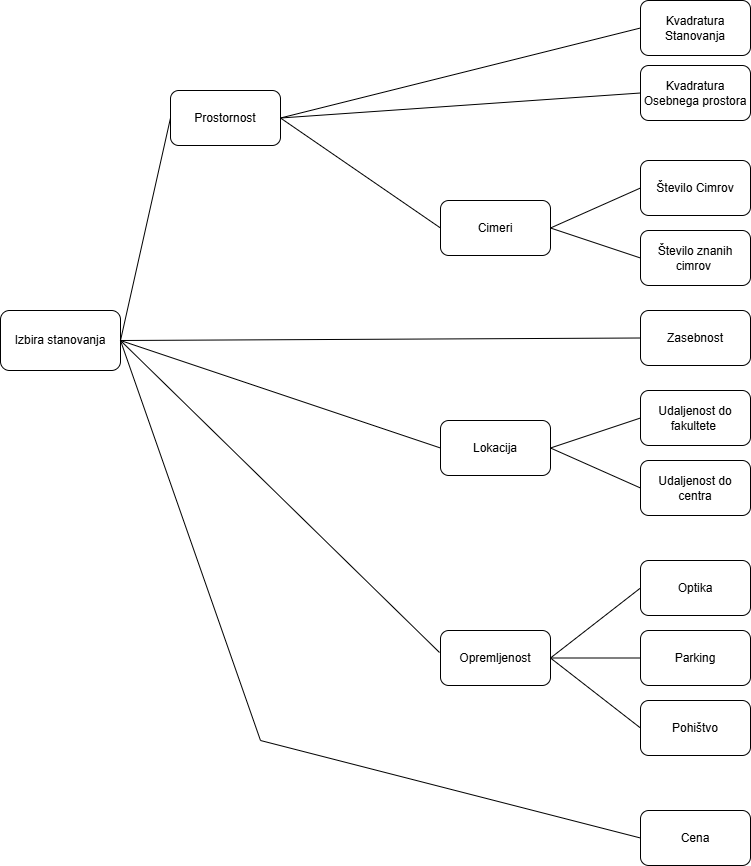

In [303]:
Image(filename='drevo.png')

### Razlaga funkcij koristnosti 

<h4>Diskretne</h4>
Diskretno kategorijo sem enostavno ovrednotil: največja vrednost prejme 100, najmanjša pa 0.

In [317]:
data_util = data.copy() # za shranjevanje koristnosti
data_util['Parking'] = data['Parking'].map({'da': 100, 'ne': 0})
data_util['Optika_internet'] = data['Optika_internet'].map({'da': 100, 'ne': 0})

<h4>Zvezne</h4>
Pri večini zveznih kategorij uporabljam linearen pristop, kjer največja vrednost prejme funkcijo koristnosti 100, najmanjša pa 0. Pri kriterijih, kot sta razdalja do fakultete in razdalja do centra, velja pravilo "manj je bolje", zato krajše razdalje prejmejo višje vrednosti funkcije koristnosti.<br>

In [305]:
columns_zvezne = ['Kvadratura_m2','Osebni_prostor_m2', 'Pohistvo', 'Zasebnost']
data_util[columns_zvezne] = (data[columns_zvezne] - data[columns_zvezne].min()) / (data[columns_zvezne].max() - data[columns_zvezne].min()) * 100

columns_zvezne_rev = ['Dist_do_faksa_km', 'Dist_do_centra_min']
data_util[columns_zvezne_rev] = (1 - (data[columns_zvezne_rev] - data[columns_zvezne_rev].min()) / 
                                 (data[columns_zvezne_rev].max() - data[columns_zvezne_rev].min())) * 100

data_util.head()


,Stanovanje,Kvadratura_m2,Cena_mesec,St_cimer,St_pozn_cimer,Pohistvo,Parking,Dist_do_faksa_km,Dist_do_centra_min,Zasebnost,Osebni_prostor_m2,Optika_internet
0,Tivoli,27.272727,375,1,1,66.666667,100,100.000000,92.5,33.333333,0.0,100
1,Preglov trg,63.636364,425,2,1,33.333333,100,0.000000,0.0,66.666667,50.0,100
2,Streliška,52.727273,420,1,1,0.000000,100,75.000000,100.0,100.000000,85.0,0
3,Gornje Poljane,0.000000,700,0,0,100.000000,100,68.750000,90.0,100.000000,100.0,100
4,Razstavišče,100.000000,350,4,0,33.333333,0,79.166667,87.5,0.000000,0.0,0


<h4>Odsekavna linearna</h4>

Čeprav je to stvar osebnega okusa, je zame samostojno bivanje največji možni luksuz, zato manjše število cimrov prinaša večjo koristnost. Kljub temu pa bivanje z dvema ali več cimri hitro postane prenaporno, zato sem se odločil, da koristnost pri več kot dveh cimerih začne padati hitreje kot sicer. Pri tem sem uporabil absolutno preslikavo.

Podobno je tudi pri ceni – ko ta preseže 500 €, koristnost pade na 0 (čeprav stanje na trgu kaže povsem drugačne vrednosti). Namesto absolutne sem tu uporabil relativno preslikavo, ki je vezana na razpon dejanskih cen v podatkih.




In [306]:
def utility_cimrov(x):
    if x <= 2:
        return max(0, 100 - 30 * x)  
    else:
        return max(0, 100 - 30 * 2 - 10 * (x - 2))  

#print(data['St_cimer'])
data_util['St_cimer'] = data['St_cimer'].apply(utility_cimrov)

def utility_cena(cena, min_cena, max_cena):
    if cena > 500:
        return 0  
    else:
        return max(0, 100 - ((cena - min_cena) / (500 - min_cena) * 100))

min_cena = data['Cena_mesec'].min()
max_cena = min(data['Cena_mesec'].max(), 500)  

data_util['Cena_mesec'] = data['Cena_mesec'].apply(lambda x: utility_cena(x, min_cena, max_cena))
data_util.head()

,Stanovanje,Kvadratura_m2,Cena_mesec,St_cimer,St_pozn_cimer,Pohistvo,Parking,Dist_do_faksa_km,Dist_do_centra_min,Zasebnost,Osebni_prostor_m2,Optika_internet
0,Tivoli,27.272727,83.333333,70,1,66.666667,100,100.000000,92.5,33.333333,0.0,100
1,Preglov trg,63.636364,50.000000,40,1,33.333333,100,0.000000,0.0,66.666667,50.0,100
2,Streliška,52.727273,53.333333,70,1,0.000000,100,75.000000,100.0,100.000000,85.0,0
3,Gornje Poljane,0.000000,0.000000,100,0,100.000000,100,68.750000,90.0,100.000000,100.0,100
4,Razstavišče,100.000000,100.000000,20,0,33.333333,0,79.166667,87.5,0.000000,0.0,0


<h4>Odvisni kriteriji</h4>
Število poznanih cimrov je tesno povezano z skupnim številom cimrov, zato sem koristnost za to kriterij izračunal ob upoštevanju tudi vrednosti v St_cimer. St_pozn_cimer je običajno "večje je boljše", razen kadar sem sam v stanovanju in nimam poznanih cimrov, saj nimam cimrov sploh, zato sem tu dodelil maksimalno koristnost.


In [307]:
def utility_znanih_cimrov(row):
    if row['St_cimer'] == 0:
        return 100  
    else:
        return (row['St_pozn_cimer'] / row['St_cimer']) * 100  
data_util['St_pozn_cimer'] = data.apply(utility_znanih_cimrov, axis=1)

data_util.head()

,Stanovanje,Kvadratura_m2,Cena_mesec,St_cimer,St_pozn_cimer,Pohistvo,Parking,Dist_do_faksa_km,Dist_do_centra_min,Zasebnost,Osebni_prostor_m2,Optika_internet
0,Tivoli,27.272727,83.333333,70,100.0,66.666667,100,100.000000,92.5,33.333333,0.0,100
1,Preglov trg,63.636364,50.000000,40,50.0,33.333333,100,0.000000,0.0,66.666667,50.0,100
2,Streliška,52.727273,53.333333,70,100.0,0.000000,100,75.000000,100.0,100.000000,85.0,0
3,Gornje Poljane,0.000000,0.000000,100,100.0,100.000000,100,68.750000,90.0,100.000000,100.0,100
4,Razstavišče,100.000000,100.000000,20,0.0,33.333333,0,79.166667,87.5,0.000000,0.0,0


### Določanje uteži

Uteži sem določil hierarhično, tako da sem se sistematično sprehodil po drevesu od listov do korena. Na vsaki ravni sem vrednosti nastavil znotraj intervala od 0 do 1 in pazil, da se uteži znotraj ene izpeljane kategorije seštejejo v 1. Končne uteži za posamezne kategorije sem izračunal tako, da sem zmnožil vse uteži na poti od lista do korena.

Na primer, utež za kategorijo "Stevilo cimrov" sem dobil kot produkt uteži za "Prostornost" (0.2), "Cimeri" (0.3) in "Stevilo cimrov" (0.5), kar daje končno utež 0.03. Na podoben način sem izračunal vse ostale uteži.

Najvišjo utež ima kategorija "Cena" (0.4), kar odraža njeno največjo pomembnost v mojem odločitvenem modelu. Sledi "Zasebnost" z utežjo 0.15, medtem ko ima kategorija "Optika" najnižjo utež (0.01), saj imam neomejen mobilni podatkovni paket in lahko uporabljam telefon kot dostopno točko.

In [308]:
#cimeri
stevilo_cimrov = 0.5
stevilo_poznanih_cimrov = 0.5

#prostornost
kvadratura_stanovanja = 0.3
kvadratura_osebnega_prostora = 0.4
cimeri = 0.3

#lokacija
dist_fax = 0.7
dist_centar = 0.3 #todo: prevod

#opremljenost
optika = 0.1
parking = 0.4
pohistvo = 0.5

#root
prostornost = 0.2
lokacija = 0.15
zasebnost = 0.15
opremljenost = 0.1
cena = 0.4


imena = ["Kvadratura_m2", "Cena_mesec", "St_cimer", "St_pozn_cimer", "Pohistvo",
        "Parking", "Dist_do_faksa_km", "Dist_do_centra_min", "Zasebnost", "Osebni_prostor_m2", "Optika_internet"]

utezi = [prostornost*kvadratura_stanovanja, cena, prostornost*cimeri*stevilo_cimrov, prostornost*cimeri*stevilo_poznanih_cimrov, 
        opremljenost*pohistvo, opremljenost*parking, lokacija*dist_fax, lokacija*dist_centar, zasebnost, prostornost*kvadratura_osebnega_prostora,
        opremljenost*optika]

for x in range(len(imena)):
 print(imena[x], "utežitev: %.3f" % (utezi[x]))

Kvadratura_m2 utežitev: 0.060
Cena_mesec utežitev: 0.400
St_cimer utežitev: 0.030
St_pozn_cimer utežitev: 0.030
Pohistvo utežitev: 0.050
Parking utežitev: 0.040
Dist_do_faksa_km utežitev: 0.105
Dist_do_centra_min utežitev: 0.045
Zasebnost utežitev: 0.150
Osebni_prostor_m2 utežitev: 0.080
Optika_internet utežitev: 0.010


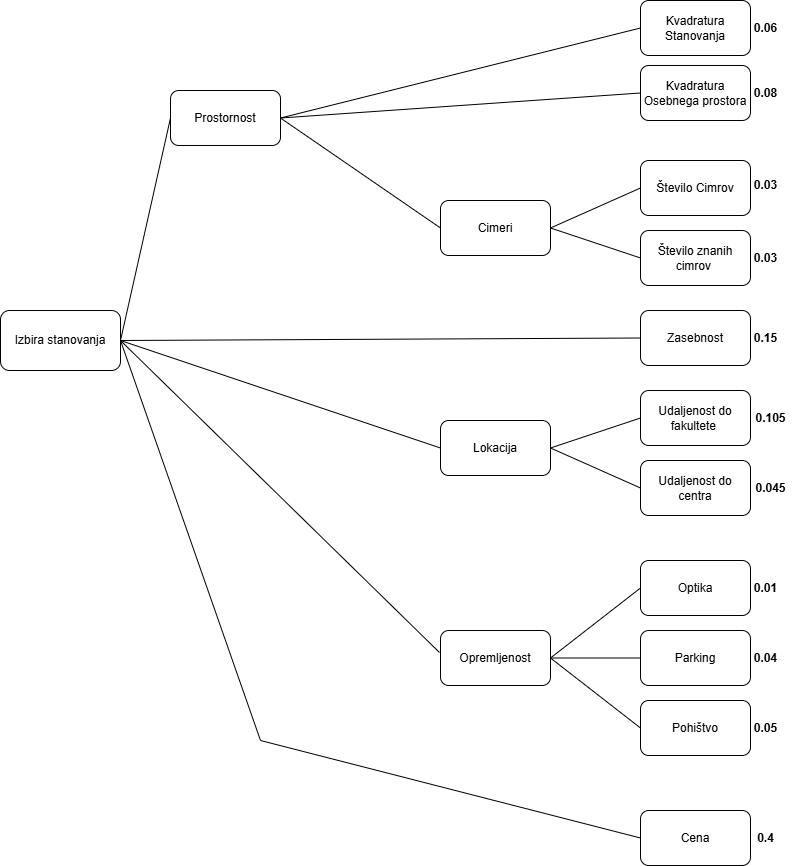

In [309]:
Image(filename='drevo_utezi.png')

### Najboljša Varianta

Za izračun skupnih ocen za vsako stanovanje sem uporabil utežene kriterije. Najprej sem izločil numerične podatke iz originalne tabele in preveril, ali se imena kriterijev ujemajo z vnaprej določenimi utežmi. Nato sem izračunal utežene ocene z množenjem vrednosti posameznih kriterijev z njihovimi pripadajočimi utežmi.

Skupni rezultat za vsako stanovanje sem dodal kot novo stolpec total_score in stanovanja razvrstil po tem rezultatu v padajočem vrstnem redu. Tako pridobljen seznam prikazuje stanovanja od najboljših do najslabših glede na vse kriterije in uteži, ki sem jih določil.



In [310]:
data_util_numeric = data_util.iloc[:, 1:]
assert list(data_util_numeric.columns) == imena, "kriteriji se ne poklapaju"
weighted_scores = data_util_numeric.mul(utezi)

data_util['total_score'] = weighted_scores.sum(axis=1)
data_util[['Stanovanje', 'total_score']]

sorted_data = data_util[['Stanovanje', 'total_score']].sort_values(by='total_score', ascending=False)
sorted_data


,Stanovanje,total_score
0,Tivoli,68.065530
2,Streliška,67.771970
4,Razstavišče,60.516667
3,Gornje Poljane,50.268750
1,Preglov trg,47.184848


### Primerjava med variantami
Med analiziranimi stanovanji ima najvišji skupni rezultat stanovanje Tivoli z vrednostjo 68,07, kar pomeni, da je glede na uteži in kriterije najboljša izbira, čeprav v nekaterih kategorijah dosega minimalne ali nizke točke (kvadratura, osebni prostor in zasebnost). Tesno za njim je alternativa stanovanje Streliška z rezultatom 67.77, kar predstavlja odlično alternativo. Obe stanovanji izstopata z dobro prostornostjo in ugodno lokacijo glede na fakulteto ter center, poleg tega pa imata obe zagotovljeno parkirno mesto in optiko. Ker sem obiskoval obeh stanovanjih, me to ne preseneča, saj sta si med seboj zelo podobni.

Na drugi strani ima najnižji rezultat stanovanje Preglov trg z vrednostjo 47.18, kar nakazuje, da ima manj ustrezne lastnosti, predvsem glede lokacije (Obožujem Fužine, a so žal malce predaleč...).

Stanovanje Razstavišče (60.52) in Gornje Poljane (50.27) sta v srednjem razponu in imata dobre lastnosti pri nekaterih kriterijih, vendar ne dosegata vodilnih stanovanj zaradi slabših rezultatov pri ključnih faktorjih, kot sta prostornost ali cena.



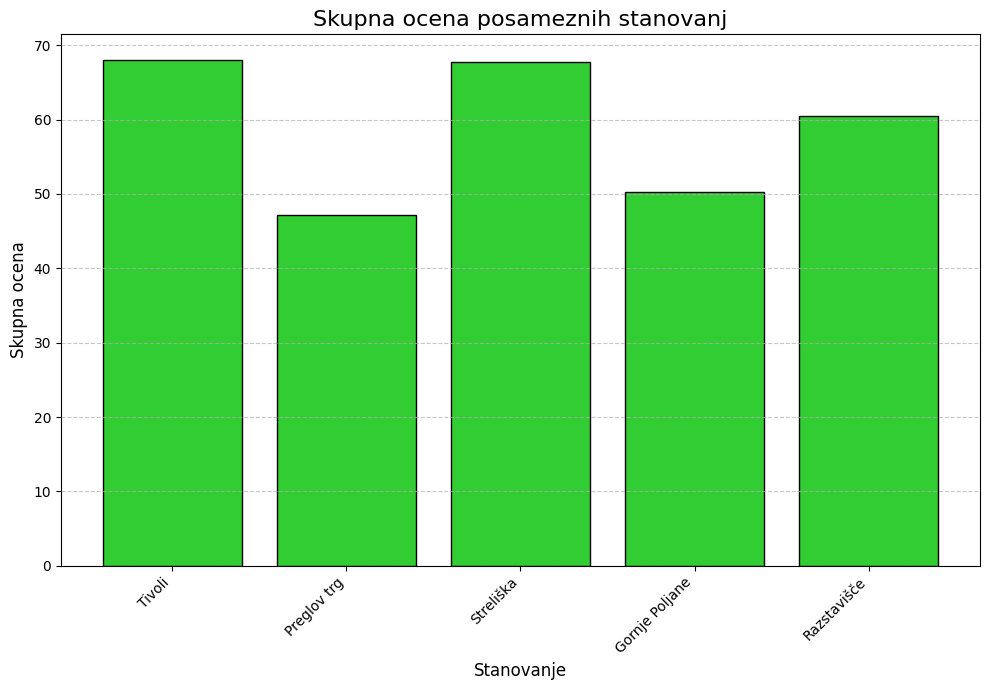

In [311]:
plt.figure(figsize=(10, 7))
plt.bar(data_util['Stanovanje'], data_util['total_score'], color='limegreen', edgecolor='black')

plt.title('Skupna ocena posameznih stanovanj', fontsize=16)
plt.xlabel('Stanovanje', fontsize=12)
plt.ylabel('Skupna ocena', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Tivoli vs Razstavišče

Za analizo sem izbral stanovanje Razstavišče, saj se precej razlikuje od stanovanja Tivoli, čeprav njune ocene niso bistveno različne.

Stanovanje Razstavišče ima nekaj prednosti, kot sta cena in velikost. Kljub prostornosti pa ponuja najmanj osebnega prostora med vsemi alternativami – enako kot Tivoli, ki ima prav tako le 15 m² (kar je najmanj med konkurenco). Na nekaterih področjih je Tivoli bistveno boljši: optika, parkirno mesto, število sostanovalcev ter število sostanovalcev, ki jih že poznam. Pri vseh drugih kategorijah pa Tivoli ohranja manjšo, a opazno prednost.


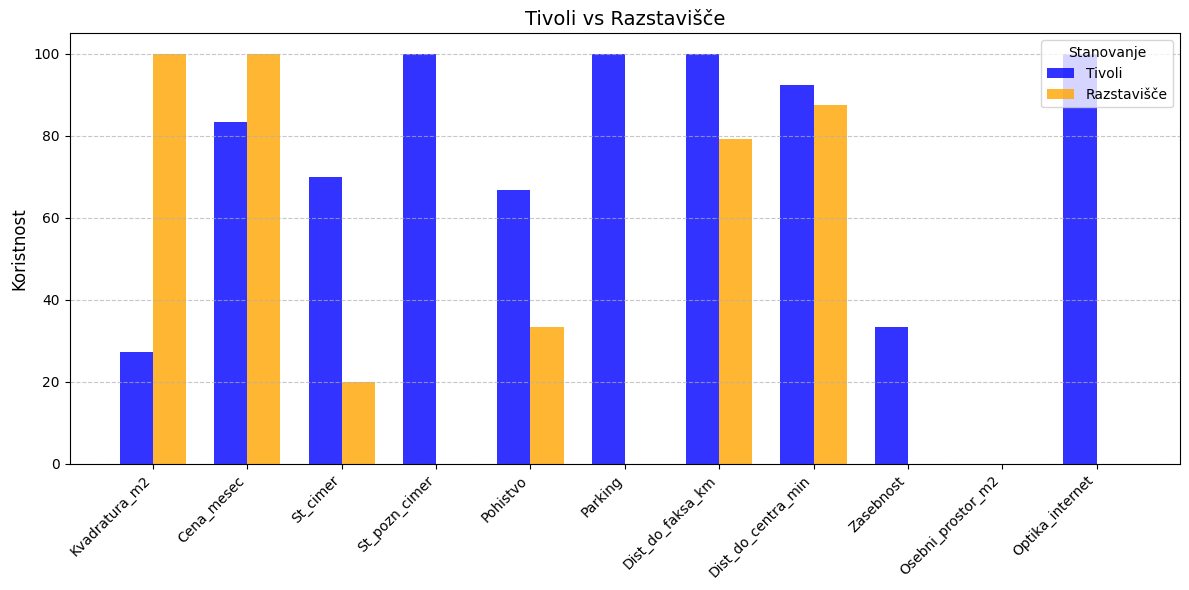

In [312]:
tivoli = data_util[data_util['Stanovanje'] == 'Tivoli'].iloc[0]
razstavisce = data_util[data_util['Stanovanje'] == 'Razstavišče'].iloc[0]

categories = [
    "Kvadratura_m2", "Cena_mesec", "St_cimer", "St_pozn_cimer", "Pohistvo",
    "Parking", "Dist_do_faksa_km", "Dist_do_centra_min", "Zasebnost", "Osebni_prostor_m2", "Optika_internet"]

tivoli_values = [tivoli[cat] for cat in categories]
razstavisce_values = [razstavisce[cat] for cat in categories]

bar_width = 0.35
x = np.arange(len(categories))

plt.figure(figsize=(12, 6))
plt.bar(x - bar_width / 2, tivoli_values, bar_width, label='Tivoli', color='blue', alpha=0.8)
plt.bar(x + bar_width / 2, razstavisce_values, bar_width, label='Razstavišče', color='orange', alpha=0.8)

plt.xticks(x, categories, rotation=45, ha='right', fontsize=10)
plt.ylabel('Koristnost', fontsize=12)
plt.title('Tivoli vs Razstavišče', fontsize=14)
plt.legend(title='Stanovanje', fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### MAP
MAP analiza, ki se je osredotočila na ceno in prostornost, je prikazala, kako se posamezna stanovanja umeščajo glede na ti dve ključni lastnosti.

Analiza je pokazala, da je Streliška ena izmed najboljših možnosti, saj združuje visoko prostornost z ugodno ceno. Razstavišče prav tako predstavlja dobro izbiro, vendar z nekoliko manjšo prostornostjo v primerjavi s Streliško ampak najboljšo ceno.

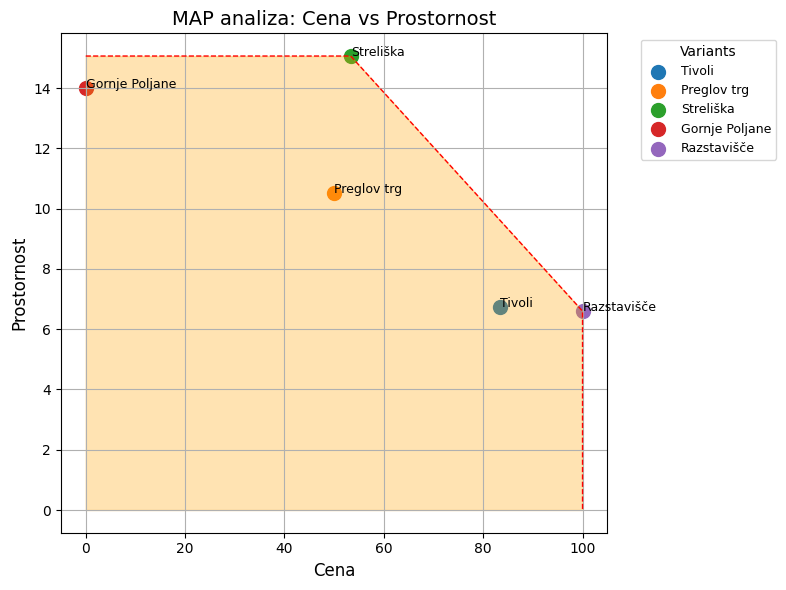

In [313]:
data_util['Prostornost'] = (
    data_util['Kvadratura_m2'] * prostornost * kvadratura_stanovanja +
    data_util['Osebni_prostor_m2'] * prostornost * kvadratura_osebnega_prostora +
    data_util['St_cimer'] * prostornost * cimeri * stevilo_cimrov +
    data_util['St_pozn_cimer'] * prostornost * cimeri * stevilo_poznanih_cimrov
)

data_sorted = data_util.sort_values(by='Prostornost', ascending=False)

streliska = data_sorted[data_sorted['Stanovanje'] == 'Streliška'].iloc[0]
razstavisce = data_sorted[data_sorted['Stanovanje'] == 'Razstavišče'].iloc[0]

polygon_points = [
    (0, streliska['Prostornost']),  # Start at (0, Streliška.Prostornost)
    (streliska['Cena_mesec'], streliska['Prostornost']),  # Streliška point
    (razstavisce['Cena_mesec'], razstavisce['Prostornost']),  # Razstavišče point
    (razstavisce['Cena_mesec'], 0)]

polygon_x = [point[0] for point in polygon_points]
polygon_y = [point[1] for point in polygon_points]

plt.figure(figsize=(8, 6))
for i, row in data_util.iterrows():
    plt.scatter(row['Cena_mesec'], row['Prostornost'], label=row['Stanovanje'], s=100)
    plt.text(row['Cena_mesec'] + 0.02, row['Prostornost'], row['Stanovanje'], fontsize=9)

plt.plot(polygon_x, polygon_y, color='red', linestyle='--', linewidth=1)

plt.fill_between(polygon_x, polygon_y, color='orange', alpha=0.3)


plt.xlabel('Cena', fontsize=12)
plt.ylabel('Prostornost', fontsize=12)
plt.title('MAP analiza: Cena vs Prostornost', fontsize=14)
plt.grid(True)
plt.legend(title='Variants', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

### Analiza občutljijvosti

Analiza občutljivosti modela razkriva, kako pomembno vlogo ima utež kriterija Cena pri rangiranju stanovanj, pri čemer je bila izvedena s tehničnim pristopom, ki vključuje postopno variiranje uteži. V okviru analize je utež kriterija Cena spreminjana v korakih po 0.05, kar je omogočilo natančno spremljanje, kako te spremembe vplivajo na skupne točkovne vrednosti posameznih stanovanj. Ta postopek je omogočil generiranje podrobnega grafa, ki jasno prikazuje premike v vodilnih stanovanjih glede na pomembnost cenovnega vidika.

Rezultati analize razkrivajo zanimive vzorce. Na začetku, ko je utež Cene nizka (pod 0.1), stanovanje na Gornjih Poljanah izstopa kot najboljša izbira. To nakazuje, da ima to stanovanje močne lastnosti v drugih kategorijah, kot so prostornost, lokacija ali opremljenost, zaradi česar prevladuje, dokler cena ni ključni kriterij. Pri rahlem povečanju uteži Cene, med 0.1 in 0.4, vodstvo prevzame stanovanje na Streliški, kar kaže na njegov dober kompromis med cenovno dostopnostjo in drugimi kriteriji. Ko utež Cene preseže 0.4, postane stanovanje Tivoli najboljša izbira. To nakazuje, da Tivoli ponuja optimalno kombinacijo kakovosti in cene, dokler cena ni skoraj edini relevantni faktor. Pri visokih vrednostih uteži Cene (okrog 0.9) prevzame vodstvo najcenejše stanovanje, Razstavišče, kar odraža preprosto dominacijo najnižje cene, ko je ta absolutno prednostna.

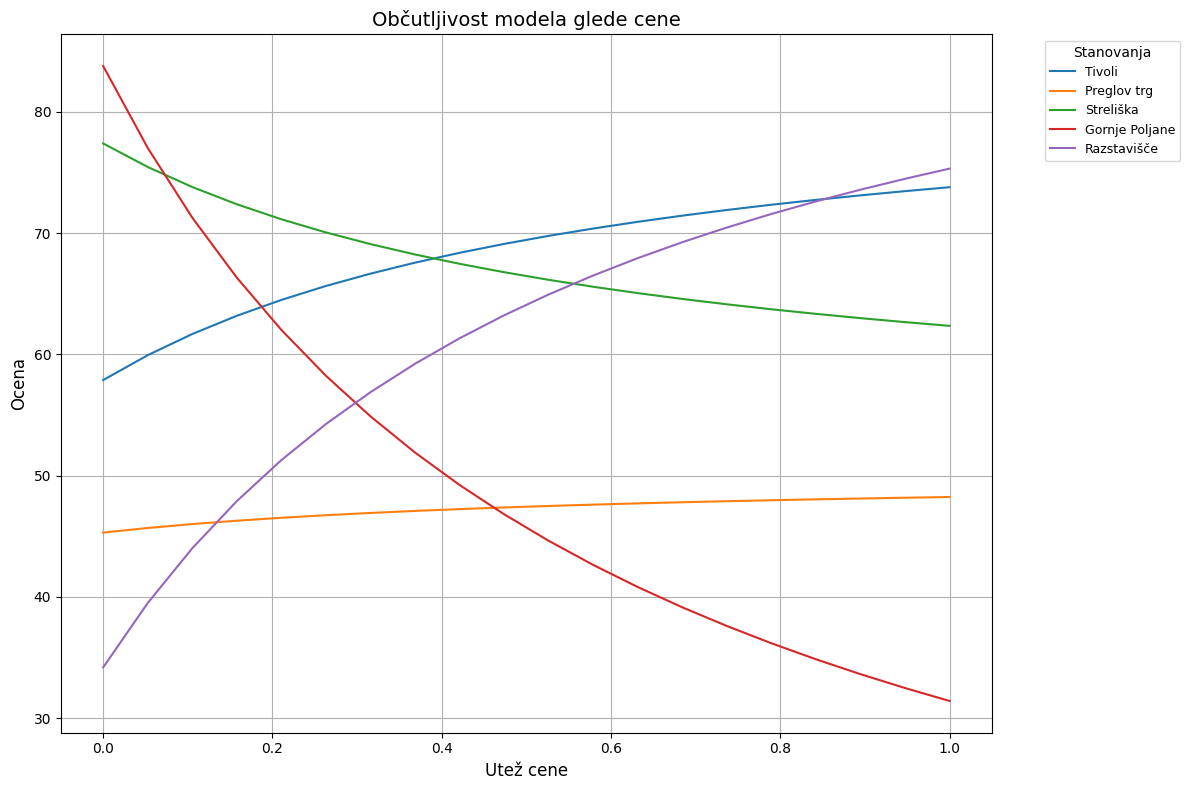

In [314]:
def calculate_scores_with_varied_weight(data, imena, base_weights, varying_weight_index, varying_values):
    results = []
    for weight in varying_values:
        adjusted_weights = base_weights.copy()
        adjusted_weights[varying_weight_index] = weight
        adjusted_weights = [w / sum(adjusted_weights) for w in adjusted_weights]
        
        data_numeric = data[imena].copy()
        weighted_scores = data_numeric.mul(adjusted_weights)
        data['total_score'] = weighted_scores.sum(axis=1)
        #print(data['total_score'])

        
        results.append(data[['Stanovanje', 'total_score']].copy())
    return results

cena_weights = np.linspace(0, 1, 20)

results = calculate_scores_with_varied_weight(data_util.copy(), imena, utezi, 1, cena_weights)

scores_by_weight = pd.DataFrame({
    weight: result.set_index('Stanovanje')['total_score']
    for weight, result in zip(cena_weights, results)
}).T

plt.figure(figsize=(12, 8))
for apartment in scores_by_weight.columns:
    plt.plot(scores_by_weight.index, scores_by_weight[apartment], label=apartment)

plt.xlabel('Utež cene', fontsize=12)
plt.ylabel('Ocena', fontsize=12)
plt.title('Občutljivost modela glede cene', fontsize=14)
plt.legend(title='Stanovanja', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.grid(True)
plt.tight_layout()
plt.show()




### Kaj če analiza?

Želel sem izvedeti, kaj bi se zgodilo, če bi mi bilo stanovanje na Gornjih Poljanah všeč, in koliko bi moral znižati najemnino, da bi postalo najboljša izbira v primerjavi s Tivolijem. V ta namen sem uporabil analizo "what-if". Na podlagi izračuna sem ugotovil, da bi morala biti najemnina za Gornje Poljane znižana za 267 evrov, da bi bila boljša izbira kot Tivoli. Kljub temu bi Gornje Poljane ostale najdražja možnost, vendar bi se vse druge kategorije (kot so prostornost, zasebnost in opremljenost) izkazale za dovolj dobre, da bi to postalo sprejemljiva izbira. Zdi se, da bo potrebna resna pogajalska spretnost...

In [316]:
numeric_columns = data_util.columns[1:-2] 

min_cena = data['Cena_mesec'].min()
max_cena = min(data['Cena_mesec'].max(), 500)  

data_util['Cena_mesec'] = data['Cena_mesec'].apply(lambda x: utility_cena(x, min_cena, max_cena))

data_util['total_score'] = data_util[numeric_columns].mul(utezi).sum(axis=1)

tivoli_score = data_util[data_util['Stanovanje'] == 'Tivoli']['total_score'].values[0]
gornje_poljane_score = data_util[data_util['Stanovanje'] == 'Gornje Poljane']['total_score'].values[0]

current_rent_gornje = data[data['Stanovanje'] == 'Gornje Poljane']['Cena_mesec'].values[0]

weight_cena = utezi[1]  

score_diff_needed = tivoli_score - gornje_poljane_score

price_reduction = 0
new_rent = current_rent_gornje

while True:
    new_utility = utility_cena(new_rent, min_cena, max_cena)   
    data_util.loc[data_util['Stanovanje'] == 'Gornje Poljane', 'Cena_mesec'] = new_utility
    data_util['total_score'] = data_util[numeric_columns].mul(utezi).sum(axis=1)

    new_score_gornje = data_util[data_util['Stanovanje'] == 'Gornje Poljane']['total_score'].values[0]

    if new_score_gornje > tivoli_score:
        price_reduction = current_rent_gornje - new_rent
        break
    
    new_rent -= 1  

print(f'Gornje Poljane potrebuje znižanje najemnine za {price_reduction:.2f} evrov, da postane boljša izbira od Tivolija.')
print(f'Nova najemnina za Gornje Poljane: {new_rent:.2f} evrov')

Gornje Poljane potrebuje znižanje najemnine za 267.00 evrov, da postane boljša izbira od Tivolija.
Nova najemnina za Gornje Poljane: 433.00 evrov


### 